In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import os

In [2]:
os.chdir("C:\\Users\\Riya\\Documents\\Codesoft\\Customer Churn Prediction\\Customer-Churn-Prediction")
df = pd.read_csv("CCP_FT.csv")
df

,Age,Balance,IsActiveMember,France,Spain,Gender_le,Exited
0,0.482051,-1.225848,0.970243,0.997204,-0.573809,-1.095988,1
1,0.366388,0.117350,0.970243,-1.002804,1.742740,-1.095988,0
2,0.482051,1.333053,-1.030670,0.997204,-0.573809,-1.095988,1
3,0.135061,-1.225848,-1.030670,0.997204,-0.573809,-1.095988,0
4,0.597715,0.785728,0.970243,-1.002804,1.742740,-1.095988,0
...,...,...,...,...,...,...,...
9995,0.135061,-1.225848,-1.030670,0.997204,-0.573809,0.912419,0
9996,-0.327593,-0.306379,0.970243,0.997204,-0.573809,0.912419,0
9997,-0.211929,-1.225848,0.970243,0.997204,-0.573809,-1.095988,1
9998,0.482051,-0.022608,-1.030670,-1.002804,-0.573809,0.912419,1


### Seperating dependent and independent variables

In [3]:
X = df.iloc[:,:-1].values
X

array([[ 0.48205148, -1.22584767,  0.97024255,  0.99720391, -0.57380915,
        -1.09598752],
       [ 0.36638802,  0.11735002,  0.97024255, -1.00280393,  1.74273971,
        -1.09598752],
       [ 0.48205148,  1.33305335, -1.03067011,  0.99720391, -0.57380915,
        -1.09598752],
       ...,
       [-0.21192932, -1.22584767,  0.97024255,  0.99720391, -0.57380915,
        -1.09598752],
       [ 0.48205148, -0.02260751, -1.03067011, -1.00280393, -0.57380915,
         0.91241915],
       [-1.13723705,  0.85996499, -1.03067011,  0.99720391, -0.57380915,
        -1.09598752]])

In [4]:
Y = df.iloc[:,-1].values
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

### Test and Train spliting of data

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.66, shuffle=True)

### Selecting Model

In [6]:
from sklearn import metrics
from sklearn.metrics import classification_report

 Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=16)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[2594  120]
 [ 498  188]]
Accuracy by confusion matrix: 0.8182352941176471


                  precision    recall  f1-score   support

without diabetes       0.84      0.96      0.89      2714
   with diabetes       0.61      0.27      0.38       686

        accuracy                           0.82      3400
       macro avg       0.72      0.61      0.64      3400
    weighted avg       0.79      0.82      0.79      3400

----------------------------------------------------------------------


Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[2573  141]
 [ 489  197]]
Accuracy by confusion matrix: 0.8147058823529412


                  precision    recall  f1-score   support

without diabetes       0.84      0.95      0.89      2714
   with diabetes       0.58      0.29      0.38       686

        accuracy                           0.81      3400
       macro avg       0.71      0.62      0.64      3400
    weighted avg       0.79      0.81      0.79      3400

----------------------------------------------------------------------


K-nearest neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[2489  225]
 [ 428  258]]
Accuracy by confusion matrix: 0.8079411764705883


                  precision    recall  f1-score   support

without diabetes       0.85      0.92      0.88      2714
   with diabetes       0.53      0.38      0.44       686

        accuracy                           0.81      3400
       macro avg       0.69      0.65      0.66      3400
    weighted avg       0.79      0.81      0.79      3400

----------------------------------------------------------------------


Decision tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[2392  322]
 [ 428  258]]
Accuracy by confusion matrix: 0.7794117647058824


                  precision    recall  f1-score   support

without diabetes       0.85      0.88      0.86      2714
   with diabetes       0.44      0.38      0.41       686

        accuracy                           0.78      3400
       macro avg       0.65      0.63      0.64      3400
    weighted avg       0.77      0.78      0.77      3400

----------------------------------------------------------------------


Support Vector Classifier

In [11]:
from sklearn import svm
svm = svm.SVC(kernel='poly') 
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[2677   37]
 [ 560  126]]
Accuracy by confusion matrix: 0.8244117647058824


                  precision    recall  f1-score   support

without diabetes       0.83      0.99      0.90      2714
   with diabetes       0.77      0.18      0.30       686

        accuracy                           0.82      3400
       macro avg       0.80      0.59      0.60      3400
    weighted avg       0.82      0.82      0.78      3400

----------------------------------------------------------------------


### Hyperparameter Tuning

In [12]:
from sklearn.model_selection import RepeatedStratifiedKFold
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.823067 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.821867 (0.006999) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.821867 (0.006999) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.821867 (0.006999) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.821900 (0.007044) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.821900 (0.007044) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.821900 (0.007044) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.821967 (0.007069) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.821967 (0.007069) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.821900 (0.007044) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.822167 (0.007479) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.822167 (0.007479) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.821900 (0.007194) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.823067 (0.007202) wi

In [13]:
lr = LogisticRegression(
    random_state=16,
    C=0.01,
    penalty='l2',
    dual=False,
    tol=0.0001,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    solver='newton-cg',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,)

lr.fit(X_train, Y_train)
Y_pred = lr.predict(X)
confusion_matrix = metrics.confusion_matrix(Y, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[7727  236]
 [1530  507]]
Accuracy by confusion matrix: 0.8234


                  precision    recall  f1-score   support

without diabetes       0.83      0.97      0.90      7963
   with diabetes       0.68      0.25      0.36      2037

        accuracy                           0.82     10000
       macro avg       0.76      0.61      0.63     10000
    weighted avg       0.80      0.82      0.79     10000

----------------------------------------------------------------------


In [14]:
import pickle
pickle.dump(lr, open('lr.pkl','wb'))

### Evaluating Results

In [17]:
os.chdir("C:\\Users\\Riya\\Documents\\Codesoft\\Customer Churn Prediction\\Customer-Churn-Prediction")
df_copy = pd.read_csv("CCP_FT.csv")

In [18]:
df_copy

,Age,Balance,IsActiveMember,France,Spain,Gender_le,Exited
0,0.482051,-1.225848,0.970243,0.997204,-0.573809,-1.095988,1
1,0.366388,0.117350,0.970243,-1.002804,1.742740,-1.095988,0
2,0.482051,1.333053,-1.030670,0.997204,-0.573809,-1.095988,1
3,0.135061,-1.225848,-1.030670,0.997204,-0.573809,-1.095988,0
4,0.597715,0.785728,0.970243,-1.002804,1.742740,-1.095988,0
...,...,...,...,...,...,...,...
9995,0.135061,-1.225848,-1.030670,0.997204,-0.573809,0.912419,0
9996,-0.327593,-0.306379,0.970243,0.997204,-0.573809,0.912419,0
9997,-0.211929,-1.225848,0.970243,0.997204,-0.573809,-1.095988,1
9998,0.482051,-0.022608,-1.030670,-1.002804,-0.573809,0.912419,1


In [19]:
Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])

In [20]:
df_results = pd.concat([df_copy, Y_pred], axis=1)
df_results

,Age,Balance,IsActiveMember,France,Spain,Gender_le,Exited,Y_pred
0,0.482051,-1.225848,0.970243,0.997204,-0.573809,-1.095988,1,0
1,0.366388,0.117350,0.970243,-1.002804,1.742740,-1.095988,0,0
2,0.482051,1.333053,-1.030670,0.997204,-0.573809,-1.095988,1,0
3,0.135061,-1.225848,-1.030670,0.997204,-0.573809,-1.095988,0,0
4,0.597715,0.785728,0.970243,-1.002804,1.742740,-1.095988,0,0
...,...,...,...,...,...,...,...,...
9995,0.135061,-1.225848,-1.030670,0.997204,-0.573809,0.912419,0,0
9996,-0.327593,-0.306379,0.970243,0.997204,-0.573809,0.912419,0,0
9997,-0.211929,-1.225848,0.970243,0.997204,-0.573809,-1.095988,1,0
9998,0.482051,-0.022608,-1.030670,-1.002804,-0.573809,0.912419,1,0


In [21]:
df_results.to_csv('CCP_RS.csv', encoding='utf-8', index=False)

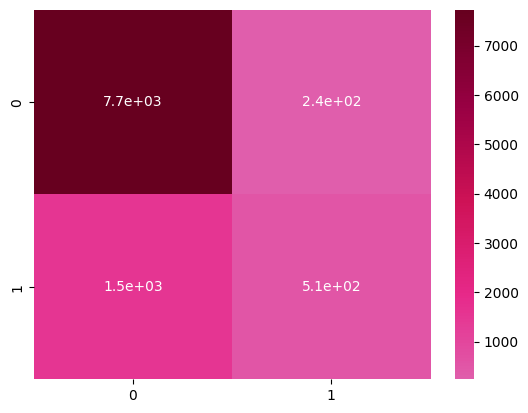

In [22]:
dataplot = sns.heatmap(confusion_matrix, cmap='PuRd', annot=True, center=0)

<Axes: title={'center': 'Predicted'}, xlabel='Age', ylabel='Balance'>

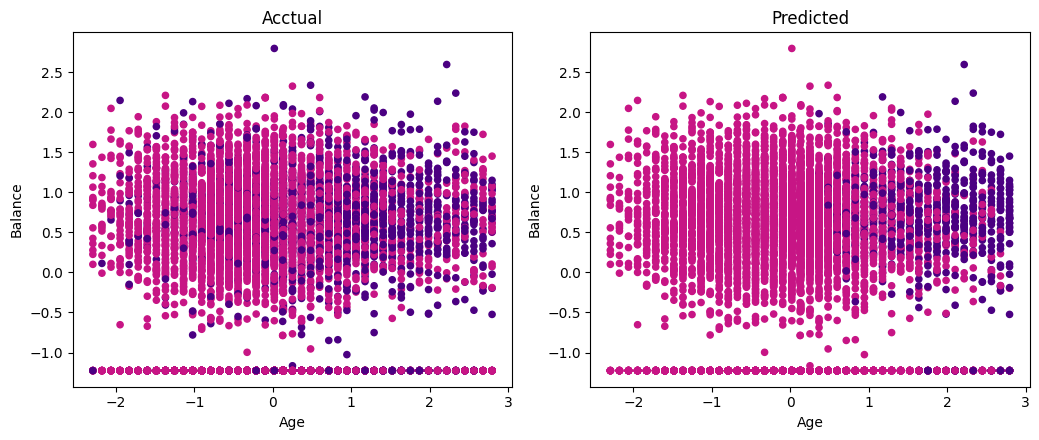

In [23]:
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

colors = {0:'MEDIUMVIOLETRED', 1:'INDIGO'}
 
df_results.plot.scatter("Age","Balance",title="Acctual",ax=axis[0],c=df_results['Exited'].map(colors))
df_results.plot.scatter("Age","Balance",title="Predicted",ax=axis[1],c=df_results['Y_pred'].map(colors))